In [0]:

import warnings; 
warnings.simplefilter('ignore')

In [2]:
pip install unidecode

In [3]:
pip install pyLDAvis

In [0]:
import pandas as pd


In [0]:
diretorio ='/content/tweets_@portalR7.csv'

In [0]:
data = pd.read_csv(diretorio, error_bad_lines=False);


In [7]:
data.head(2)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Mais de um terço de pacientes internados com C...,False,447,NaN,2020-05-16 03:00:00,True,NaN,1.261492e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,85.0,False,False,NaN,NaN
1,"Navio de cruzeiros atracado em Santos, SP, é l...",False,283,NaN,2020-05-16 02:45:00,False,NaN,1.261488e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,15.0,False,False,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           786 non-null    object 
 1   favorited      782 non-null    object 
 2   favoriteCount  786 non-null    object 
 3   replyToSN      41 non-null     object 
 4   created        786 non-null    object 
 5   truncated      786 non-null    bool   
 6   replyToSID     35 non-null     object 
 7   id             782 non-null    float64
 8   replyToUID     37 non-null     float64
 9   statusSource   782 non-null    object 
 10  screenName     782 non-null    object 
 11  retweetCount   782 non-null    float64
 12  isRetweet      782 non-null    object 
 13  retweeted      782 non-null    object 
 14  longitude      0 non-null      float64
 15  latitude       0 non-null      float64
dtypes: bool(1), float64(5), object(10)
memory usage: 93.0+ KB


In [0]:

data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text

In [10]:
print(len(documents))
print(documents[:5])

786
                                                text  index
0  Mais de um terço de pacientes internados com C...      0
1  Navio de cruzeiros atracado em Santos, SP, é l...      1
2  Supostas citações a Witzel em investigação que...      2
3  Fernando de Noronha investiga cinco casos susp...      3
4  Só em 2020, a empresa recebeu R$ 129 milhões d...      4


In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import string



In [12]:
# Retire o comentário apenas na primeira vez que executar esse notebook no seu ambiente
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## adicionar essas palavras na lista de stop words
veja,apos,sobre,globonews,anos,blog,dias,novo,contra,fazem,nesta,feira,sobre,cada,quase,pode,hoje,apos,durante,meio,defende,nesta

In [0]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','""','"',':','globonews']

custon_stop_words = custon_stop_words +['veja','apos','sobre','globonews','anos','blog','dias','novo','contra','fazem','nesta','feira','sobre','cada'
,'quase','pode','hoje','durante','meio','defende','nesta']
punctuation = list(string.punctuation)
lista_stopwords  =list(set(stopwords_pt + punctuation + custon_stop_words+ ['rt', 'via'] ))



In [16]:
custon_stop_words

['nessa',
 'todo',
 'pra',
 'vou',
 'aqui',
 'se',
 '.',
 ',',
 'lá',
 'vcs',
 '""',
 '"',
 ':',
 'globonews',
 'veja',
 'apos',
 'sobre',
 'globonews',
 'anos',
 'blog',
 'dias',
 'novo',
 'contra',
 'fazem',
 'nesta',
 'feira',
 'sobre',
 'cada',
 'quase',
 'pode',
 'hoje',
 'durante',
 'meio',
 'defende',
 'nesta']

In [0]:
from nltk.stem.porter import *
stemmer = nltk.stem.RSLPStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [0]:
def remove_caracteres_especiais(texto):
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    remove = ''.join([i for i in texto if not i in punctuations])
    remove_1 =  re.sub(r" ?\([^)]+\)", "", remove)
    remove_2 =''.join(remove_1).replace("'", " ")
    remove_3 =''.join(remove_2).replace("[", " ")
    remove_4 =''.join(remove_3).replace("]", " ")
    return str(remove_4)    

In [0]:
def isVogal(texto):
  vogais = ['a', 'e', 'i', 'o', 'u']
  temVogal =False
    
  for c in texto.lower():
    if c in vogais:
        temVogal = True
        break

  return temVogal;
  

In [0]:
isVogal("STF")

False

In [0]:
def remove_url(txt):
    return re.sub(r'http\S+', '', txt)

In [0]:
from unidecode import unidecode
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
      palavra  = remove_url(token)
      palavra  = remove_caracteres_especiais(palavra)
      palavra = unidecode(palavra.lower())

      if palavra not in stopwords_pt and len(palavra) > 3:
        # if(isVogal(palavra)):
        result.append(palavra) # Sem tratamentos
            # result.append(lemmatize_stemming(unidecode(token.lower()))) #Todas minúsculas, sem acentos e radical

    return result

In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    np.random.seed(2018)
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()


In [20]:
doc_sample = documents[documents['index'] == 50].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['@ValdoCruz', '@gcamarotti', '#Pronunciamento', '-', "'A", 'vida', 'é', 'feita', 'de', 'escolhas.', 'E', 'hoje', 'eu', 'escolhi', "sair',", 'afirma', 'Nelson', 'Teich…', 'https://t.co/kQBM4XZgZX']


 tokenized and lemmatized document: 
['valdocruz', 'gcamarotti', 'pronunciamento', 'vida', 'feita', 'escolhas', 'hoje', 'escolhi', 'sair', 'afirma', 'nelson', 'teich', 'kqbm', 'xzgzx']


In [21]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:10]

0    [terco, pacientes, internados, covid, apresent...
1    [navio, cruzeiros, atracado, santos, liberado,...
2    [supostas, citacoes, witzel, investigacao, pre...
3    [fernando, noronha, investiga, cinco, casos, s...
4    [empresa, recebeu, milhoes, governo, fluminens...
5    [tres, medicos, piloto, morrem, queda, aviao, ...
6    [mantem, escolas, fechadas, adia, pagamento, t...
7    [justica, condena, filho, mafia, capturados, f...
8    [argentina, desenvolve, teste, rapido, detecta...
9    [parque, animais, japao, reabre, publico, visi...
Name: text, dtype: object

In [22]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break

0 apresentam
1 covid
2 internados
3 lesoes
4 pacientes
5 precisam
6 respirador
7 rins
8 terco
9 atracado
10 cruzeiros
11 liberado
12 navio
13 quarentena
14 santos
15 tvwywayleb
16 citacoes
17 enviadas
18 investigacao
19 mario
20 peixoto


In [0]:
#dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

In [23]:
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus[100]

[(101, 1),
 (131, 1),
 (201, 1),
 (359, 1),
 (377, 1),
 (378, 1),
 (379, 1),
 (380, 1),
 (381, 1),
 (382, 1),
 (747, 1),
 (748, 1)]

In [24]:
bow_doc_100 = corpus[100]
for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                               dictionary[bow_doc_100[i][0]], bow_doc_100[i][1]))

Word 101 ("ministro") appears 1 time.
Word 131 ("saude") appears 1 time.
Word 201 ("apos") appears 1 time.
Word 359 ("teich") appears 1 time.
Word 377 ("anulado") appears 1 time.
Word 378 ("desgastado") appears 1 time.
Word 379 ("fritura") appears 1 time.
Word 380 ("isolado") appears 1 time.
Word 381 ("nelson") appears 1 time.
Word 382 ("oassunto") appears 1 time.
Word 747 ("assumir") appears 1 time.
Word 748 ("gbee") appears 1 time.


In [0]:
warnings.simplefilter('ignore')

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=4, id2word=dictionary)

In [26]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.009*"covid" + 0.008*"bolsonaro" + 0.006*"apos" + 0.006*"pandemia" + 0.005*"isolamento" + 0.005*"coronavirus" + 0.005*"video" + 0.004*"veja" + 0.004*"brasil" + 0.003*"reuniao"
Topic: 1 
Words: 0.016*"coronavirus" + 0.010*"bolsonaro" + 0.007*"pandemia" + 0.006*"covid" + 0.005*"presidente" + 0.005*"governo" + 0.005*"apos" + 0.005*"saude" + 0.005*"mortes" + 0.004*"ministro"
Topic: 2 
Words: 0.008*"coronavirus" + 0.007*"bolsonaro" + 0.007*"covid" + 0.006*"brasil" + 0.005*"isolamento" + 0.005*"anos" + 0.004*"saude" + 0.004*"pandemia" + 0.004*"sobre" + 0.004*"veja"
Topic: 3 
Words: 0.014*"coronavirus" + 0.006*"veja" + 0.006*"mortes" + 0.006*"covid" + 0.005*"brasil" + 0.005*"anos" + 0.005*"apos" + 0.005*"pandemia" + 0.004*"novo" + 0.004*"sobre"


In [27]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.010268 -0.093249       1        1  30.713305
0     -0.022508  0.051089       2        1  23.579218
2     -0.059376  0.024369       3        1  23.190172
3      0.092151  0.017791       4        1  22.517307, topic_info=            Term       Freq      Total Category  logprob  loglift
29   coronavirus  90.000000  90.000000  Default  30.0000  30.0000
129   isolamento  26.000000  26.000000  Default  29.0000  29.0000
846      segundo   9.000000   9.000000  Default  28.0000  28.0000
179        feira  10.000000  10.000000  Default  27.0000  27.0000
89          veja  28.000000  28.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
234      auxilio   4.300464  16.204121   Topic4  -6.0397   0.1643
146     hospital   3.627713   9.449619   Topic4  -6.2098   0.5335
36       governo   4.426455  27.313168   Topic4  -6.0108  -0.3289
90         video   4.064433  25.781067   Topic4  -6.0962  -0.3565
93     bolsonaro   4.251862  58.429581   Topic4  -6.0511  -1.1296

[322 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2247      3  0.507136     abaixo
1535      2  0.509733  acreditam
1724      2  0.509703      adiar
671       1  0.943334    agentes
626       1  0.251286     alerta
...     ...       ...        ...
771       3  0.137959     vitima
771       4  0.551838     vitima
3346      2  0.509713    werneck
23        1  0.214593     witzel
23        3  0.643779     witzel

[487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [28]:
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4638785297079835


In [29]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {'Topics': [],
                 'Coherence': []
                }

pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:

  cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k)
  model_results['Topics'].append(k)
  model_results['Coherence'].append(cv)
  pbar.update(1)
pbar.close()

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

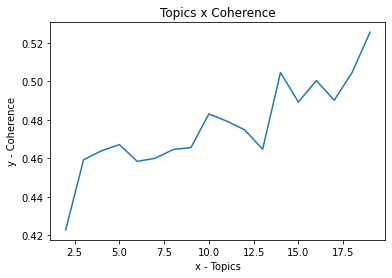

In [30]:
import matplotlib.pyplot as plt 

x = model_results['Topics']
y = model_results['Coherence']

plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - Topics') 
# naming the y axis 
plt.ylabel('y - Coherence') 
  
# giving a title to my graph 
plt.title('Topics x Coherence') 
  
# function to show the plot 
plt.show() 

## Segundo Modelo  com 7 topicos

In [0]:
warnings.simplefilter('ignore')

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=6, id2word=dictionary)

In [32]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"covid" + 0.007*"bolsonaro" + 0.006*"pandemia" + 0.005*"apos" + 0.005*"isolamento" + 0.005*"oassunto" + 0.004*"sobre" + 0.004*"veja" + 0.004*"video" + 0.004*"coronavirus"
Topic: 1 
Words: 0.017*"coronavirus" + 0.008*"covid" + 0.007*"bolsonaro" + 0.006*"mortes" + 0.006*"pandemia" + 0.006*"sobre" + 0.006*"saude" + 0.005*"apos" + 0.005*"presidente" + 0.005*"lockdown"
Topic: 2 
Words: 0.011*"bolsonaro" + 0.008*"covid" + 0.007*"brasil" + 0.007*"coronavirus" + 0.005*"isolamento" + 0.005*"anos" + 0.004*"saude" + 0.004*"veja" + 0.004*"mortes" + 0.004*"governo"
Topic: 3 
Words: 0.017*"coronavirus" + 0.009*"veja" + 0.006*"mortes" + 0.005*"covid" + 0.005*"pandemia" + 0.005*"novo" + 0.004*"brasil" + 0.004*"maio" + 0.004*"casos" + 0.004*"governo"
Topic: 4 
Words: 0.013*"coronavirus" + 0.008*"pandemia" + 0.008*"apos" + 0.007*"bolsonaro" + 0.007*"covid" + 0.005*"fake" + 0.005*"fatooufake" + 0.005*"isolamento" + 0.004*"video" + 0.004*"paulo"
Topic: 5 
Words: 0.011*"bolsonaro" + 

In [33]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.016847 -0.006071       1        1  18.663925
0      0.062582  0.089573       2        1  16.817904
4     -0.050913 -0.063403       3        1  16.690144
2      0.073370 -0.007899       4        1  16.637285
3     -0.101770  0.058714       5        1  15.993197
5      0.033578 -0.070913       6        1  15.197541, topic_info=            Term       Freq      Total Category  logprob  loglift
29   coronavirus  88.000000  88.000000  Default  30.0000  30.0000
93     bolsonaro  57.000000  57.000000  Default  29.0000  29.0000
89          veja  29.000000  29.000000  Default  28.0000  28.0000
266   fatooufake  10.000000  10.000000  Default  27.0000  27.0000
265         fake  11.000000  11.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
103        sobre   2.933711  29.723787   Topic6  -6.0290  -0.4316
154       contra   2.635729  17.463882   Topic6  -6.1361  -0.0069
108       estado   2.397982   8.726359   Topic6  -6.2307   0.5923
272       mortes   2.790739  33.030479   Topic6  -6.0790  -0.5871
129   isolamento   2.622862  26.892244   Topic6  -6.1410  -0.4435

[424 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2014      3  0.744085    acalmar
990       3  0.301895     acesso
990       6  0.603790     acesso
1723      2  0.492713  acontecer
104       2  0.492710    acusado
...     ...       ...        ...
771       6  0.272261     vitima
408       3  0.251981       voce
408       6  0.755942       voce
2778      5  0.496985      voces
2780      5  0.496985       zeca

[741 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4, 6])

In [34]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4583834600970221


In [35]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 12
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {'Topics': [],
                 'Coherence': []
                }

pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:

  cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k)
  model_results['Topics'].append(k)
  model_results['Coherence'].append(cv)
  pbar.update(1)
pbar.close()

100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


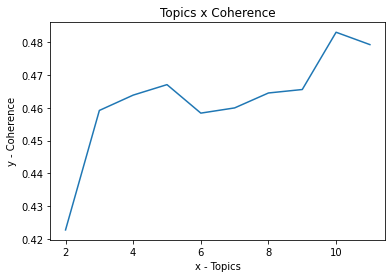

In [36]:
import matplotlib.pyplot as plt 

x = model_results['Topics']
y = model_results['Coherence']

plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - Topics') 
# naming the y axis 
plt.ylabel('y - Coherence') 
  
# giving a title to my graph 
plt.title('Topics x Coherence') 
  
# function to show the plot 
plt.show() 

In [37]:
model_results

{'Coherence': [0.4227547019179222,
  0.45919924856865674,
  0.4638785297079835,
  0.46707559162293955,
  0.4583834600970221,
  0.4599756710618167,
  0.46452885586597636,
  0.46558466726949443,
  0.48305744306153053,
  0.47928412463363856],
 'Topics': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

# primeiro modelo com 6 tópicos

In [38]:
np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"covid" + 0.008*"isolamento" + 0.007*"pandemia" + 0.006*"apos" + 0.006*"sobre" + 0.006*"bolsonaro" + 0.006*"veja" + 0.004*"video" + 0.004*"meses" + 0.004*"mundo"
Topic: 1 
Words: 0.015*"coronavirus" + 0.007*"bolsonaro" + 0.007*"covid" + 0.006*"mortes" + 0.006*"pandemia" + 0.006*"apos" + 0.006*"saude" + 0.006*"governo" + 0.005*"teich" + 0.005*"paulo"
Topic: 2 
Words: 0.010*"bolsonaro" + 0.008*"covid" + 0.007*"brasil" + 0.007*"coronavirus" + 0.006*"mortes" + 0.005*"isolamento" + 0.005*"cada" + 0.004*"saude" + 0.004*"veja" + 0.004*"pandemia"
Topic: 3 
Words: 0.019*"coronavirus" + 0.009*"veja" + 0.009*"mortes" + 0.007*"brasil" + 0.005*"pandemia" + 0.005*"auxilio" + 0.005*"casos" + 0.004*"covid" + 0.004*"novo" + 0.004*"governo"
Topic: 4 
Words: 0.011*"coronavirus" + 0.008*"apos" + 0.007*"pandemia" + 0.007*"video" + 0.007*"anos" + 0.006*"bolsonaro" + 0.005*"ministro" + 0.005*"isolamento" + 0.005*"moro" + 0.005*"covid"
Topic: 5 
Words: 0.014*"bolsonaro" + 0.010*"brasil"

In [39]:
coherence_model_lda_seis_topicos = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4583834600970221


In [40]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.085211  0.044010       1        1  12.032623
1      0.020407 -0.001293       2        1  10.699009
0      0.104335 -0.049175       3        1  10.683892
9     -0.078663  0.033481       4        1  10.476305
4      0.060896  0.066727       5        1  10.130920
5      0.037569  0.039474       6        1   9.861612
3     -0.048066 -0.015870       7        1   9.771950
8      0.055361 -0.015218       8        1   9.189751
7     -0.047375 -0.146071       9        1   9.073477
2     -0.019253  0.043936      10        1   8.080460, topic_info=             Term       Freq      Total Category  logprob  loglift
29    coronavirus  88.000000  88.000000  Default  30.0000  30.0000
708   emergencial  11.000000  11.000000  Default  29.0000  29.0000
90          video  25.000000  25.000000  Default  28.0000  28.0000
1           covid  56.000000  56.000000  Default  27.0000  27.0000
1175         cada  10.000000  10.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
27          casos   1.670405  18.742332  Topic10  -5.9605   0.0980
36        governo   1.628194  27.044353  Topic10  -5.9861  -0.2943
121       reuniao   1.299796  13.450750  Topic10  -6.2114   0.1789
156          dias   1.299792  14.191484  Topic10  -6.2114   0.1253
527      lockdown   1.299789  12.789421  Topic10  -6.2114   0.2293

[762 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
717       1  0.367040   abertura
717       9  0.367040   abertura
92        6  0.372730       acao
92        7  0.372730       acao
3454      8  0.750890    acentua
...     ...       ...        ...
2944      7  0.740571       zcsr
3260      7  0.740571       zera
2992      8  0.750890       zkeo
488       5  0.744540  zkuftkazs
3535      2  0.736083   zsjrmyrq

[1370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 1, 10, 5, 6, 4, 9, 8, 3])

In [41]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48305744306153053
